# Cuda

In [ ]:
!pip install cupy-cuda100

     |████████████████████████████████| 369.7MB 49kB/s 


In [ ]:
import cupy as cp
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import random
import time
from matplotlib.animation import FuncAnimation, writers, ArtistAnimation
import random
import scipy.signal as signal
from tqdm import tqdm

## [High performance with <u><i><strong>CUDA</strong></i></u>](https://cupy.chainer.org/)
<u><i><strong>CuPy</strong></i></u> is an open-source matrix library accelerated with <u><i><strong>NVIDIA CUDA</strong></i></u>. <u><i><strong>CuPy</strong></i></u> provides GPU accelerated computing with Python. CuPy uses CUDA-related libraries including <u><i><strong>cuBLAS</strong></i></u>, <u><i><strong>cuDNN</strong></i></u>, <u><i><strong>cuRand</strong></i></u>, <u><i><strong>cuSolver</strong></i></u>, <u><i><strong>cuSPARSE</strong></i></u>, <u><i><strong>cuFFT</strong></i></u> and <u><i><strong>NCCL</strong></i></u> to make full use of the <u><i><strong>GPU</strong></i></u> architecture.
The figure shows <u><i><strong>CuPy</strong></i></u> speedup over NumPy. Most of them perform well on a <u><i><strong>GPU</strong></i></u> using CuPy out of the box. <u><i><strong>CuPy</strong></i></u> speeds up some operations more than 100X. You can read original benchmark article in [Single-<u><i><strong>GPU</strong></i></u> <u><i><strong>CuPy</strong></i></u> Speedups (RAPIDS AI)](https://medium.com/rapids-ai/single-gpu-cupy-speedups-ea99cbbb0cbb).

![CuPy speedup over NumPy](CuPy_Performance.png)

## [Highly compatible with <u><i><strong>NumPy</strong></i></u>](https://cupy.chainer.org/)
<u><i><strong>CuPy</strong></i></u>'s interface is highly compatible with <u><i><strong>NumPy</strong></i></u>; in most cases it can be used as a <strong><i><u>drop-in replacement</u></i></strong>. <i><u>All you need to do</u></i> is just <strong><i><u>replace numpy with cupy</u></i></strong> in your Python code. [Basics of <u><i><strong>CuPy</strong></i></u> (Tutorial)](https://docs-cupy.chainer.org/en/stable/tutorial/basic.html) is usefull to learn first step of <u><i><strong>CuPy</strong></i></u>.
<u><i><strong>CuPy</strong></i></u> supports various methods, indexing, data types, broadcasting and more. [Comparison Table (Reference Manual)](https://docs-cupy.chainer.org/en/stable/reference/comparison.html) shows a list of NumPy / <u><i><strong>SciPy</strong></i></u> APIs and its corresponding <u><i><strong>CuPy</strong></i></u> implementations.

In [ ]:
x = cp.arange(6).reshape(2, 3).astype('f')
print("x =\n", x)

sum_result = x.sum(axis=1)
print("\nsum = ",sum_result)

x =
 [[0. 1. 2.]
 [3. 4. 5.]]

sum =  [ 3. 12.]


## [Easy to write a custom kernel](https://cupy.chainer.org/)
You can easily make a custom <u><i><strong>CUDA</strong></i></u> kernel if you want to make your code run faster, requiring only a small code snippet of <u><i><strong>C++</strong></i></u>. <u><i><strong>CuPy</strong></i></u> automatically wraps and compiles it to make a <u><i><strong>CUDA</strong></i></u> binary. Compiled binaries are cached and reused in subsequent runs. Please read [User-Defined Kernels (Tutorial)](https://docs-cupy.chainer.org/en/latest/tutorial/kernel.html).
And, you can also use raw <u><i><strong>CUDA</strong></i></u> kernel via [Raw modules (Tutorial)](https://docs-cupy.chainer.org/en/latest/tutorial/kernel.html#raw-modules).


In [ ]:
x=cp.arange(6, dtype='f').reshape(2, 3)
y=cp.arange(3, dtype='f')
kernel=cp.ElementwiseKernel(
    'float32 x,float32 y','float32 z',
        '''if(x-2>y){
        z=x*y;
        }else{
        z=x+y;
        }''',
    'my_kernel')

print("Input x = \n", x)
print("\nInput y = \n", y)

result = kernel(x, y)

print("\nresult of the kernel =\n", result)

Input x = 
 [[0. 1. 2.]
 [3. 4. 5.]]

Input y = 
 [0. 1. 2.]

result of the kernel =
 [[ 0.  2.  4.]
 [ 0.  4. 10.]]


## Task 10. Saxpy

By using <u><i><strong>CuPy</strong></i></u>, implement SAXPY function. The function is described in the picture.

![saxpy](saxpy.jpg)

T10.1. Explanation:

Difference between cupy and numpy:
- Cupy uses GPU to perform computation.

How does cupy handle data transfers between cpu and gpu?
- y_cpu = cp.asnumpy(y_gpu)
- y_gpu = cp.asarray(y_cpu)

In [ ]:
from datetime import datetime

In [ ]:
def saxpy(a, x, y):
    return a*x + y

# Speedup function calls
# Reduce memory consumption
# Relax the bandwidth bottleneck
# Only element-wise and reduction operations are supported
@cp.fuse()
def fused_saxpy(a, x, y):
    return a*x + y

kernel=cp.ElementwiseKernel(
    'float32 x,float32 y,float32 a','float32 z',
        '''z = a*x + y''')

In [ ]:
sizes = [int(a) for a in np.logspace(2, 5, 40)]

In [ ]:
# with numpy
xp = np
np_res = []
for size in tqdm(sizes):
    x, y, a = xp.ones((1024, size), 'f'), xp.ones((1024, size), 'f'), xp.float32(2.0)
    start = datetime.now()
    t = saxpy(x, y, a)
    np_res.append((datetime.now()-start).total_seconds())

100%|██████████| 40/40 [00:01<00:00, 27.29it/s]


In [ ]:
# with cupy
xp = cp
cp_res = []
for size in tqdm(sizes):
    x, y, a = xp.ones((1024, size), 'f'), xp.ones((1024, size), 'f'), xp.float32(2.0)
    start = datetime.now()
    t = saxpy(x, y, a)
    cp_res.append((datetime.now()-start).total_seconds())

100%|██████████| 40/40 [00:00<00:00, 8247.98it/s]


In [ ]:
# with kernel
xp = cp
cpc_res = []
for size in tqdm(sizes):
    x, y, a = xp.ones((1024, size), 'f'), xp.ones((1024, size), 'f'), xp.float32(2.0)
    start = datetime.now()
    t = kernel(x, y, a)
    cpc_res.append((datetime.now()-start).total_seconds())

100%|██████████| 40/40 [00:00<00:00, 7006.27it/s]


In [ ]:
# fused cupy
xp = cp
cpf_res = []
for size in tqdm(sizes):
    x, y, a = xp.ones((1024, size), 'f'), xp.ones((1024, size), 'f'), xp.float32(2.0)
    start = datetime.now()
    t = fused_saxpy(x, y, a);
    cpf_res.append((datetime.now()-start).total_seconds())

100%|██████████| 40/40 [00:00<00:00, 9929.11it/s]


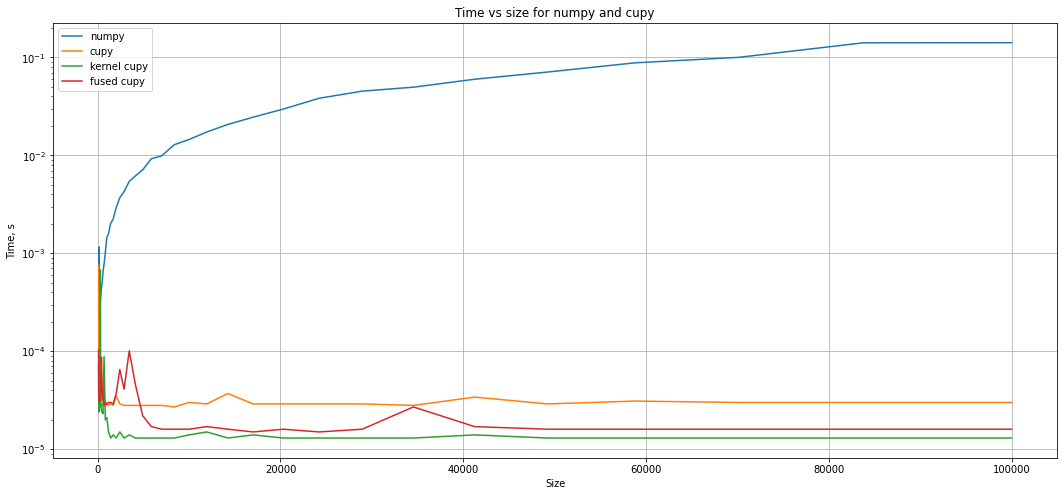

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))

plt.plot(sizes, np_res, label="numpy")
plt.plot(sizes, cp_res, label="cupy")
plt.plot(sizes, cpc_res, label="kernel cupy")
plt.plot(sizes, cpf_res, label="fused cupy")
plt.yscale("log")

plt.legend()
plt.grid(True)
plt.title("Time vs size for numpy and cupy")
plt.ylabel("Time, s")
plt.xlabel("Size");

## Task 11. CuPy-based Bifurcation map

By using <u><i><strong>CuPy</strong></i></u>, reimplement bifurcation map (Task 1).

In [ ]:
from random import uniform
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

T11.1 Bifurcation map is performed using cupy arrays

By using <u><i><strong>CuPy</strong></i></u>, reimplement bifurcation map (Task 1).

In [ ]:
def np_fun(r, x):
    res = r*x*(1-x)
    return res

@cp.fuse()
def cp_fun(r, x):
    res = r*x*(1-x)
    return res

kernel=cp.ElementwiseKernel(
    'float32 r,float32 x','float32 res',
        '''res = r*x*(1-x)''')

In [ ]:
s = int(1e8)
np_r = np.linspace(0, 4, s, dtype='float32')
cp_r = cp.linspace(0, 4, s, dtype='float32')
x = np.random.rand()
cp_x = cp.float32(x)

In [ ]:
# T11.2 Cupy bifurcation map implementation is profiled

# numpy
import cProfile
cProfile.run('np_fun(np_r, x)')

         4 function calls in 0.119 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.118    0.118    0.118    0.118 <ipython-input-43-1736a7abcc20>:1(np_fun)
        1    0.000    0.000    0.119    0.119 <string>:1(<module>)
        1    0.000    0.000    0.119    0.119 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
# fused cupy
cProfile.run('cp_fun(cp_r, x)')

         3 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
# T11.3 Graph Time( # iterations) is given. Plot cpu, mpi and cupy implementations

np_res = []
for s in tqdm(np.logspace(2, 7, 20)):
    s = int(s)
    np_r, np_x = np.linspace(0, 4, s).astype(np.float32), np.random.rand(s).astype(np.float32)
    t = %timeit -o -q np_fun(np_r, np_x)
    np_res.append(t)


100%|██████████| 20/20 [00:50<00:00,  2.51s/it]


In [ ]:
# cupy fused
cpf_res = []
for s in tqdm(np.logspace(2, 7, 20)):
    s = int(s)
    cp_r, cp_x = cp.linspace(0, 4, s, dtype='f'), cp.random.rand(s, dtype='f')
    t = %timeit -o -q cp_fun(cp_r, cp_x)
    cpf_res.append(t)


100%|██████████| 20/20 [01:25<00:00,  4.26s/it]


In [ ]:
# kernel
cpc_res = []
for s in tqdm(np.logspace(2, 7, 20)):
    s = int(s)
    cp_r, cp_x = cp.linspace(0, 4, s, dtype='f'), cp.random.rand(s, dtype='f')
    t = %timeit -o -q kernel(cp_r, cp_x)
    cpc_res.append(t)


100%|██████████| 20/20 [01:12<00:00,  3.65s/it]


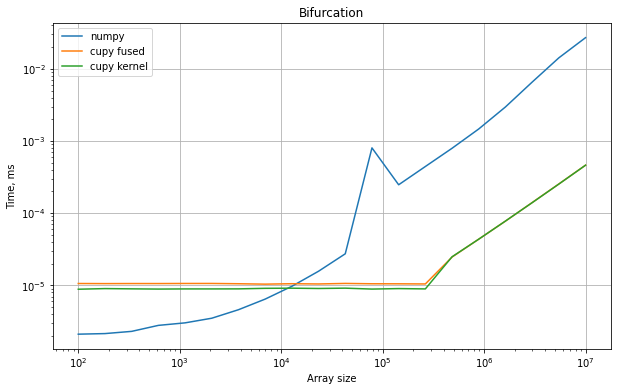

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.logspace(2, 7, 20), [i.best for i in np_res], label='numpy')
plt.plot(np.logspace(2, 7, 20), [i.best for i in cpf_res], label='cupy fused')
plt.plot(np.logspace(2, 7, 20), [i.best for i in cpc_res], label='cupy kernel')

plt.title('Bifurcation')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Array size')
plt.ylabel('Time, ms')
plt.grid(True)
plt.legend();

## Task 12. Histogram


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the suggested function:
$$
 f(x) = (z^2(x) + z^3(x) - 200 \,\, z^4(x) )\,\,\sin(\,\,100000\,\,(x + 0.5)\,\,),
 \\
 \text{where    }\:\:\: z(x) = \sin(3\,\,x)-0.5
$$
* Plot function on the $x$ interval $[0,\,\, 1]$. Number of points = 10000000.
* Get minimal and maximal values of function on the interval $[0,\,\, 1]$: $f_{min}$ and $f_{max}$.
* Divide $y=f(x), \: (x \in [0,\,\, 1]) \:$ interval $[f_{min}, f_{max}]$ into $10$ $y=f(x)$ subintervals of length $\delta$ equal to $0.1 \,\, (f_{max}-f_{min})$: $[f_{min},\,\, f_{min} + \delta],\,\, [f_{min}+ \delta,\,\, f_{min} + 2 \,\, \delta],\,\, \dots,\,\, [f_{max}- \delta,\,\, f_{max}]$.
* Compute number of $y=f(x), \: (x \in [0,\,\, 1]) \:$ values in each subinterval. Use $\operatorname{cp.sum(\dots)}$
* Plot histogram. <strong>[Hint: how to represent the histogram](https://cdn.datamentor.io/wp-content/uploads/2017/11/r-histogram.png)</strong>

<strong >Hint about function $f(x)$ appearance:</strong>
    ![Hint](Hint.png)

In [ ]:
@cp.fuse()
def z(x):
    return cp.sin(3*x) - 0.5

@cp.fuse()
def f(x):
    return (cp.power(z(x), 2) + cp.power(z(x), 3) - 
            200*cp.power(z(x), 4))*cp.sin(1e5*(x + 0.5))

In [ ]:
x = cp.linspace(0, 1, int(1e7))
y = f(x)
f_min = y.min()
f_max = y.max()
delta = 0.1 * (f_max - f_min)
print('Min: {}. Max {}.'.format(f_min, f_max))

Min: -12.365544666168107. Max 12.374912294071224.


T12.1. Function from Jupyter notebook is plotted with suggested number of points

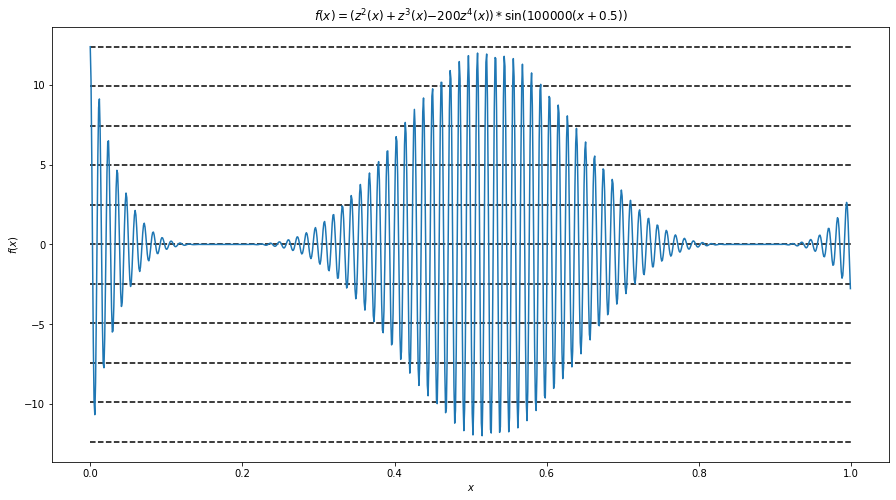

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(x.tolist()[::10000], y.tolist()[::10000]);
plt.hlines([np.float(f_min + i*delta) for i in range(11)], 0, 1, linestyles='dashed')
plt.title("$f(x) = (z^2(x)+z^3(x)−200z^4(x))*\sin(100000(x+0.5))$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$");

T12.2. Histogram is plotted

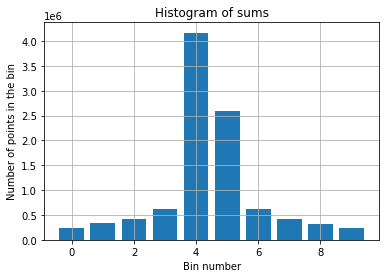

In [ ]:
# sum values of points in each interval
res = []
for i in range(10):
    r = ((f_min + (i+1)*delta) > y) & (y > (f_min + i*delta))
    r = cp.sum(r)
    res.append(cp.asnumpy(r))
res = np.array(res)

plt.bar(np.arange(10), res)
plt.grid(True)
plt.title('Histogram of sums')
plt.xlabel('Bin number')
plt.ylabel('Number of points in the bin');

In [ ]:
# select points in the interval
sub_y = ((f_min + delta) > y) & (y > f_min)
np_sub_y = cp.asnumpy(sub_y)

T12.3. Computation time of cp.cumsum() and np.cumsum() are provided (only these two functions, no need to include plot drawing time into it)

In [ ]:
# for one interval - cupy
%timeit -n 100 cp.sum(sub_y)

100 loops, best of 3: 15.3 µs per loop


In [ ]:
# for one interval - numpy
%timeit -n 100 np.sum(np_sub_y)

100 loops, best of 3: 9.11 ms per loop


## Task 13. Image blur


<u>By using <i><strong>CuPy</strong></i>:</u>
* Implement the gpu version of the image blur algorithm. What you need to do is calculate convolution some image and some blur filter on every pixel. You should compute convolutions in parallel for every pixel using gpu cores.
* Take any 100x100 image and 

<strong >Example of a blurred image:</strong>
    ![Blur](blur.jpg)

In [ ]:
!wget -P img/task13/ -q https://quintagroup.com/cms/python/images/opencv-logo.png/@@images/image.png

In [ ]:
from PIL import Image
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

In [ ]:
def blur_loop(img, kernel, im_s, xp):
    res = xp.empty_like(img)
    # just convolution
    for i in range(k_hs, im_s - k_hs):
        for j in range(k_hs, im_s - k_hs):
            res[i, j] = (img[i-k_hs:i+k_hs+1, j-k_hs:j+k_hs+1] * kernel).sum()

    return res

def blur(big_img, kernel, im_s, xp):
    f_kernel = xp.ravel(kernel)          # (7, 7) -> 49
    res = xp.dot(big_img, f_kernel)      # (10000, 49) * (49,) = (10000,)
    return xp.reshape(res, (im_s, im_s)) # (100, 100)

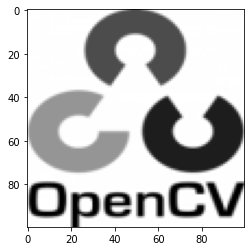

In [ ]:
im_s = 100
fname = "img/task13/image.png"
pil_img = Image.open(fname).resize((im_s, im_s)).convert('L')
img = np.array(pil_img)
plt.imshow(img, cmap='gray');

In [ ]:
k_hs = 3
k_s = 2*k_hs + 1
kernel = np.ones((k_s, k_s)) # 7x7
kernel /= kernel.sum()

cp_img = cp.array(img)
cp_kernel = cp.array(kernel)

In [ ]:
big_img = np.empty((im_s*im_s, k_s*k_s), dtype='float32') # (100*100, 7*7)
for i in range(k_hs, im_s - k_hs):
    for j in range(k_hs, im_s - k_hs):
        big_img[i*im_s + j] = img[i-k_hs:i+k_hs+1, j-k_hs:j+k_hs+1].flatten()
cp_big_img = cp.array(big_img)

np_res = blur(big_img, kernel, im_s, np)
cp_res = blur(cp_big_img, cp_kernel, im_s, cp)
cp_res = cp.asnumpy(cp_res)

T13.1. Before and after pictures are given (any 100x100 image)

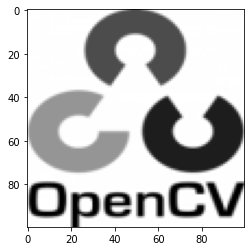

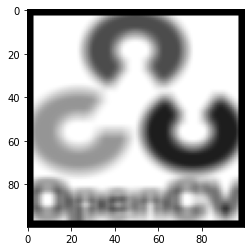

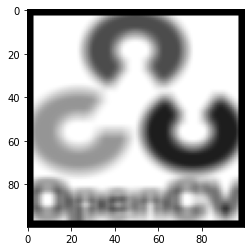

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(np_res, cmap='gray')
plt.show()
plt.imshow(cp_res, cmap='gray');

T13.2. Cupy computation time is given

In [ ]:
%timeit -n 10 blur(cp_big_img, cp_kernel, im_s, cp)
%timeit -n 10 blur_loop(cp_img, cp_kernel, im_s, cp)

10 loops, best of 3: 79.7 µs per loop
10 loops, best of 3: 419 ms per loop


T13.3. Numpy computation time is given

In [ ]:
%timeit -n 10 blur(big_img, kernel, im_s, np)
%timeit -n 10 blur_loop(img, kernel, im_s, np)

10 loops, best of 3: 1.38 ms per loop
10 loops, best of 3: 39.4 ms per loop
